# Polynomial Regression
The problem with our linear model was that it was too simple for the data and resulted in underfitting (high bias). In this part of the exercise, you will address this problem by adding more features.<br><br>

The file <strong><em>ex5data1</em></strong> contains a data set which includes train set, test set, validation set.<br>
The structure of the dataset described blow:<br>
1. x = **Water level (a single feature)**
2. y = **Value of flowed water**
3. xval = **x validation set**
4. yval = **y validation set**
5. xtest = **x test set**
6. ytest = **y test set**


<br><br>
<strong>
Our assignment has these sections:
1. Visualizing the Data
    1. Converting .mat to .csv
    2. Loading Dataset
    3. Visualizing The Dataset
2. Adding Polynomial Features
    1. Adding Features
    2. Normalizing Features
3. Learning Polynomial Regression
    1. Regularized Linear Regression Cost Function
    2. Regularized Linear Regression Gradient
    3. Fitting Linear Regression
    4. Visualization of Fitted Model
4. Adjusting The Regularization Parameter
    1. 
5. Selecting λ Using a Cross Validation Set
    1. 
6. Computing Test Set Error
    1.  
7. Plotting Learning Curves With Randomly Selected Examples
    
</strong>

In each section full description provided.

## 1. Visualizing the Dataset
Before starting on any task, it is often useful to understand the data by visualizing it.<br>

### 1.A Converting .mat to .csv
In this specific assignment, the instructor added a .mat file as training set and weights of trained neural network. But we have to convert it to .csv to use in python.<br>
After all we now ready to import our new csv files to pandas dataframes and do preprocessing on it and make it ready for next steps.

In [1]:
# import libraries
import scipy.io
import numpy as np

data = scipy.io.loadmat("ex5data1")

Now we **extract** `x`, `y`, `xval`, `yval`, `xtest` and `ytest`</strong> variables from the .mat file and save them into .csv file for further usage. After running the below code you should see:
1. X.csv
2. y.csv 
3. Xtest.csv
4. ytest.csv
5. Xval.csv
6. yval.csv

files in your directory.

In [2]:
for i in data:
    if '__' not in i and 'readme' not in i:
        np.savetxt((i+".csv"),data[i],delimiter=',')

### 1.B Loading Dataset
First we import .csv files into pandas dataframes then save them into numpy arrays.<br><br>

In [3]:
# import library
import pandas as pd

# saving .csv files to pandas dataframes
x_df = pd.read_csv('X.csv',names= ['x'])
xtest_df = pd.read_csv('Xtest.csv',names= ['xtest'])
xval_df = pd.read_csv('Xval.csv',names= ['xval'])
y_df = pd.read_csv('y.csv',names=['y'])
ytest_df = pd.read_csv('ytest.csv',names= ['ytest'])
yval_df = pd.read_csv('yval.csv',names= ['yval'])

In [4]:
x_df.head(3)

,x
0,-15.936758
1,-29.152979
2,36.189549


In [5]:
y_df.head(3)

,y
0,2.134311
1,1.173257
2,34.359109


Now we convert all **pandas dataframes** to **numpy arrays** for calculations.

In [6]:
# saving x, y, xval, yval, xtest and ytest into numpy arrays
x = x_df.iloc[:,:].values
xval = xval_df.iloc[:,:].values
xtest = xtest_df.iloc[:,:].values

y = y_df.iloc[:,:].values
yval = yval_df.iloc[:,:].values
ytest = ytest_df.iloc[:,:].values

# number of examples and number of features
m, n = x.shape

m_val = xval.shape[0]
m_test = xtest.shape[0]

print('#{} Number of training samples, #{} features per sample'.format(m,n))
print('#{} Number of validation samples, #{} features per sample'.format(m_val,n))
print('#{} Number of test samples, #{} features per sample'.format(m_test,n))

#12 Number of training samples, #1 features per sample
#21 Number of validation samples, #1 features per sample
#21 Number of test samples, #1 features per sample


In [7]:
# define some hypter parameters

# define theta as zero
theta = None

# define hyperparameter λ
lambda_ = None

# reshape (-1,1) because we just have one feature in y column
y = y.reshape(-1,1)

### 1.C Ploting Dataset
We will begin by visualizing the dataset containing historical records on **the change in the water level**, `x`, and **the amount of water flowing out of the dam**, `y`.<br><br>
This dataset is divided into three parts:<br>
    • A **training set** that your model will learn on: `x`, `y`<br>
    • A **cross validation set** for determining the regularization parameter: `xval`, `yval`<br>
    • A **test set** for evaluating performance. These are **"unseen" examples** which your model did not see during training: `xtest`, `ytest`<br>

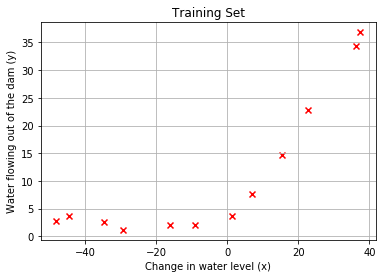

In [9]:
# import libraries
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x, y, color='red', marker='x')
plt.title('Training Set')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.grid()
plt.show()

# 2. Adding Polynomial Features

For use polynomial regression, our hypothesis has the form:<img src='img/poly.jpg'>
Notice that by defining `x1 = (waterLevel)`, `x2 = (waterLevel)`<sup>2</sup>, ... , `xp = (waterLevel)`<sup>p</sup>, we obtain a linear regression model where the features are the various powers of the original value (waterLevel).<br><br>
Now, you will **add more features using the higher powers** of the existing feature `x` in the dataset. Your task write a function so that the function **maps the original training set `x` of size `m × 1` into its higher powers**. Specifically, when a training set `x` of size `m × 1` is passed into the function, the **function should return a `m × p` matrix `x_poly`**, where column `1` holds the original values of `x`, column `2` holds the values of `x^2`, column `3` holds the values of `x^3`, and so on.<br> 
Note that **you don’t have to account for the zero-eth power in this function**.

## 2.A Adding Features
`poly_features(x, p)` takes a data matrix `x` (size `m x 1`) and **maps each example into its polynomial features** where <br>
`x_poly[i, :] = [x(i) x(i)^2 x(i)^3 ...  x(i)^p]`

In [12]:
x_poly = None # the output of polu_features
p = 8 # order of polynomial features

from sklearn.preprocessing import PolynomialFeatures # import libraries
def poly_features(x,p):    
    polynomial_features = PolynomialFeatures(degree=8, include_bias=False)
    x_poly = polynomial_features.fit_transform(x)
    return x_poly
    

In [13]:
x_poly = poly_features(x,p)
x_poly_df = pd.DataFrame(x_poly,columns=None)
x_poly_df.head(3)

,0,1,2,3,4,5,6,7
0,-15.936758,253.980260,-4047.621971,6.450597e+04,-1.028016e+06,1.638324e+07,-2.610958e+08,4.161020e+09
1,-29.152979,849.896197,-24777.006175,7.223235e+05,-2.105788e+07,6.139000e+08,-1.789701e+10,5.217513e+11
2,36.189549,1309.683430,47396.852168,1.715271e+06,6.207487e+07,2.246462e+09,8.129843e+10,2.942154e+12


#### Now we add these features to `xtest` and `xval`

In [14]:
xval_poly = poly_features(xval,p)
xval_poly_df = pd.DataFrame(xval_poly,columns=None)
xval_poly_df.head(3)

,0,1,2,3,4,5,6,7
0,-16.746536,280.446461,-4696.506686,7.865022e+04,-1.317119e+06,2.205718e+07,-3.693813e+08,6.185857e+09
1,-14.577471,212.502653,-3097.751215,4.515738e+04,-6.582804e+05,9.596063e+06,-1.398863e+08,2.039189e+09
2,34.515759,1191.337596,41119.920932,1.419285e+06,4.898771e+07,1.690848e+09,5.836090e+10,2.014371e+12


In [15]:
xtest_poly = poly_features(xtest,p)
xtest_poly_df = pd.DataFrame(xtest_poly,columns=None)
xtest_poly_df.head(3)

,0,1,2,3,4,5,6,7
0,-33.318004,1110.089390,-36985.962723,1.232298e+06,-4.105772e+07,1.367961e+09,-4.557774e+10,1.518559e+12
1,-37.912164,1437.332181,-54492.373421,2.065924e+06,-7.832364e+07,2.969419e+09,-1.125771e+11,4.268041e+12
2,-51.206938,2622.150494,-134272.297639,6.875673e+06,-3.520822e+08,1.802905e+10,-9.232124e+11,4.727488e+13


## 2.B Normalize Features
It turns out that if we run the training directly on the projected data, will not work well as the **features** would be **badly scaled** (e.g., an example with **x = 40 will now have a feature x<sub>8</sub> = 40<sup>8</sup> = 6.5 × 10<sup>12</sup>**). <br>
Therefore, you will need to use **feature normalization**.
`feature_normalize(x)` returns a **normalized version** of `x` where the **mean value of each feature is 0** and the **standard deviation is 1**. This is often a **good preprocessing step** to do when working with learning algorithms.

In [16]:
def feature_normalize(x, xtest, xval):
    sigma = x.std()
    mean = x.mean()
    x_norm = (x-mean)/sigma
    xtest_norm = (xtest-mean)/sigma
    xval_norm = (xval-mean)/sigma
    return (x_norm, xtest_norm, xval_norm)

In [17]:
x_poly_norm, xtest_poly_norm, xval_poly_norm = feature_normalize(x_poly,xtest_poly, xval_poly)

In [18]:
print('x_poly_norm : mean= {}, std={}.'.format(x_poly_norm.mean(),x_poly_norm.std()))
print('xval_poly_norm : mean= {}, std={}.'.format(xval_poly_norm.mean(),xval_poly_norm.std()))
print('xtest_poly_norm : mean= {}, std={}.'.format(xtest_poly_norm.mean(),xtest_poly_norm.std()))

x_poly_norm : mean= -1.850371707708594e-17, std=0.9999999999999999.
xval_poly_norm : mean= 0.044848630228004685, std=1.2247731967735336.
xtest_poly_norm : mean= 0.1606768875137592, std=2.5245490041714636.


Look at this [link](https://stackoverflow.com/questions/40405803/mean-of-data-scaled-with-sklearn-standardscaler-is-not-zero) if you have any question why after using **scaling**, we still do not have **mean = 0** and **std = 1**.<br>
Actually the values are zero.

In [20]:
# add 1's to the features of x as bias
x_poly_norm = np.append(np.ones(shape=(m,1)),x_poly_norm,axis = 1)
xval_poly_norm = np.append(np.ones(shape=(xval_poly_norm.shape[0],1)),xval_poly_norm,axis = 1)
xtest_poly_norm = np.append(np.ones(shape=(xtest_poly_norm.shape[0],1)),xtest_poly_norm,axis = 1)

# 3. Learning Polynomial Regression
We will proceed to **train polynomial regression using your linear regression cost function**.<br><br>
Keep in mind that even though **we have polynomial terms** in our feature vector, we are **still solving a linear regression** optimization problem. The **polynomial terms have simply turned into features** that we can use for linear regression. We are using the **same cost function and gradient** that you wrote for the earlier part of this exercise.<br>

## 3.A Regularized Linear Regression Cost Function
Recall that regularized linear regression has the following cost function:<img src='img/rlrc.jpg'><br><br>
where `lambda` is a regularization parameter which controls the degree of regularization (thus, **help preventing overfitting**). The **regularization** term puts a **penalty** on the overal **cost J**.<br><br>
As the magnitudes of the model parameters **θ<sub>j</sub>**
increase, the penalty increases as well. Note that you should not regularize the **θ<sub>0</sub>** term.<br><br>
For this part of the exercise, you will be using a **polynomial of degree 8**.<br>
After learning the parameters **θ**, you should draw two plots generated for polynomial regression with **λ = 0**.<br>

### Implementation
`linear_reg_cost(x, y, theta, lambda_)` computes the cost of using `theta` as the parameter for linear regression to fit the data points in `x` and `y`. Returns the cost in `j` as cost.

In [22]:
def hypothesis(x,theta):
    return np.dot(x,theta)

In [23]:
def linear_reg_cost(theta_flatten, x_flatten, y, lambda_, num_of_samples, num_of_features):
    x = x_flatten.reshape(num_of_samples, num_of_features)
    theta = theta_flatten.reshape(n,1)
    loss = hypothesis(x,theta)-y
    regularizer = lambda_*np.sum(theta[1:,:]**2)/(2*m)
    j = np.sum(loss ** 2)/(2*m) 
    return j

## 3.B Regularized Linear Regression Gradient
Correspondingly, the **partial derivative of regularized linear regression’s cost for θ<sub>j</sub>** is defined as:<img src='img/rlrg.jpg'>

### Implementation
`linear_reg_grad(x, y, theta, lambda_)` computes the gradient of cost of using `theta` as the parameter for linear regression to fit the data points in `x` and `y`. Returns the gradient in `grad`.

In [24]:
def linear_reg_grad(theta_flatten, x_flatten, y, lambda_, num_of_samples, num_of_features):
    x = x_flatten.reshape(num_of_samples, num_of_features)
    m,n = x.shape
    theta = theta_flatten.reshape(n,1)
    new_theta = np.zeros(shape=(theta.shape))
    loss = hypothesis(x,theta)-y
    gradient = np.dot(x.T,loss)
    new_theta[0:,:] = gradient/m
    new_theta[1:,:] = gradient[1:,:]/m + lambda_*(theta[1:,]/m)
    return new_theta.flatten()

## 3.C Fitting Linear Regression
Once your cost function and gradient are working correctly, the next part is to **compute the optimal values** of **θ**.<br>
This training function uses `fmin_cg` to optimize the cost function. <a href='https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html'>See official doc</a><br>

### Implementation
Once you have implemented the cost and gradient correctly, the `fmin_cg` function will use your cost function to train regularized linear regression and update theta each time.

In [28]:
m,n = x_poly_norm.shape
lambda_ = 0
theta = np.ones(n)

from scipy.optimize import fmin_cg
new_theta = fmin_cg(f=linear_reg_cost, x0=theta, fprime=linear_reg_grad, args=(x_poly_norm.flatten(), y, lambda_, m,n))

Optimization terminated successfully.
         Current function value: 15.795185
         Iterations: 198
         Function evaluations: 454
         Gradient evaluations: 454


In [31]:
new_theta

array([  286.25746025,   -46.25445386,   -46.25037961,   -45.57463053,
         -44.4634646 ,   229.73026807,  1062.20194521,   561.40028703,
          10.76226527])

## 3.D Visualization of Fitted Model
Finally, you should also **plot the best fit line**. The best fit line tells us that the model is a good fit to the data because the **data has a non-linear pattern**. While **visualizing the best fit** as shown is **one possible way to debug** your learning algorithm, it is not always easy to visualize the data and model.<br><br>
In the next section, you will implement a function to **generate learning curves** that can help you debug your learning algorithm even if it is **not easy to visualize** the data.

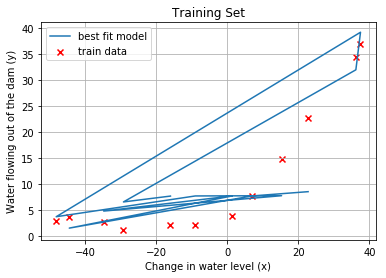

In [43]:
# import libraries
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x, y, color='red', marker='x', label= 'train data')
plt.plot(x.flatten(),np.dot(x_poly_norm,new_theta.reshape(n,1).flatten()), label = 'best fit model')
#plt.axis([-40,50,-75,75])
plt.title('Training Set')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.grid()
plt.legend()
plt.show()